# Name : Usman Zaheer
# Roll No : BSAI-129
# Github  : 
# Linkedin :  https://www.linkedin.com/feed/update/urn:li:activity:7252610896374497281/

# . Loading Dataset Directly from UCI:
The given dataset is a maternal health risk data availble on UCI. The dataset has 6 medical features including age , SystolicBP , Diastolic BP , BS , BodyTemp and HearthRate. There is a target class name RiskRate which has 3 categorical classes as  low risk , mid risk and high risk. The features are of numerical type while target class is a categorical data.

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np 
import  pandas as pd
  
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
# data (as pandas dataframes) 



  


# . Separating the features and target class:
We will first separate the features and target variable for the better understanding of the data.

In [5]:
from ucimlrepo import fetch_ucirepo 
import numpy as np 
import  pandas as pd
  
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 

# data (as pandas dataframes) 
X = maternal_health_risk.data.features #features
print(X.head())
print(type(X))

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76
<class 'pandas.core.frame.DataFrame'>


In [6]:
from ucimlrepo import fetch_ucirepo 
import numpy as np 
import pandas as pd

# Fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 

# Features (as pandas DataFrame)
X = maternal_health_risk.data.features 

# Target variable (as pandas Series)
y = maternal_health_risk.data.targets



# Print the first few records of the target variable
print("\nTarget Variable:")
y.head(), print(type(y))



Target Variable:
<class 'pandas.core.frame.DataFrame'>


(   RiskLevel
 0  high risk
 1  high risk
 2  high risk
 3  high risk
 4   low risk,
 None)

# . Checking null records in features:

In [7]:
X.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
dtype: int64

# . Checking null records in target variable:

In [8]:
y.isna().sum()

RiskLevel    0
dtype: int64

# . Basic Visualization of Features:

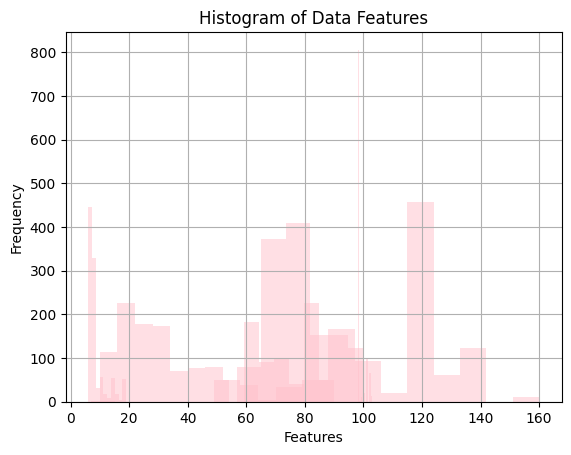

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm

features = ['Age','SystolicBP','DiastolicBP'  ,'BS','BodyTemp','HeartRate']
for f in X:
    plt.hist(X[f],color='pink' , alpha = 0.5)
plt.title('Histogram of Data Features')  # Title of the plot
plt.xlabel('Features')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.grid()  # Optional: Add a grid
plt.show()  # Display the plot
plt.show()

# . Basic visualization of target variable:

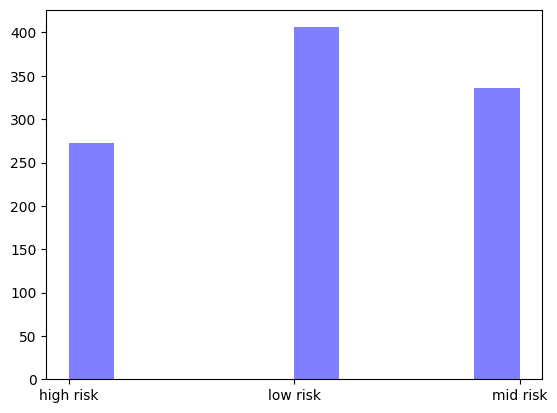

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm

plt.hist(y,color='blue',alpha=0.5)
plt.show()


# . Checking the skewness in the features:

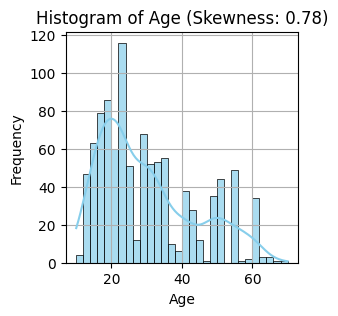

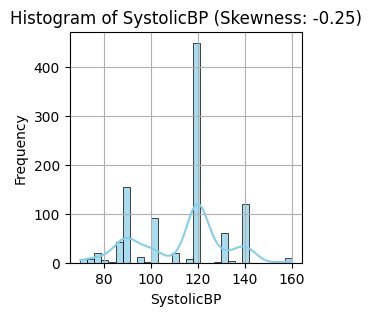

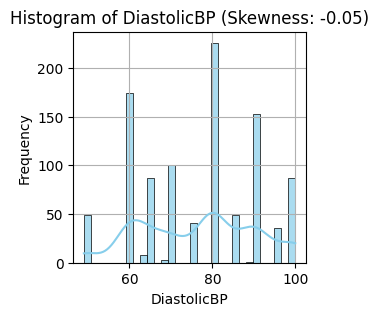

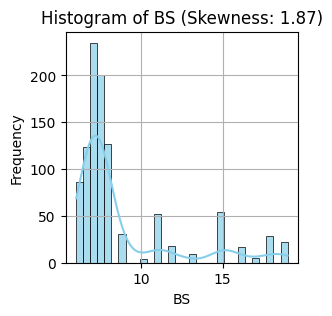

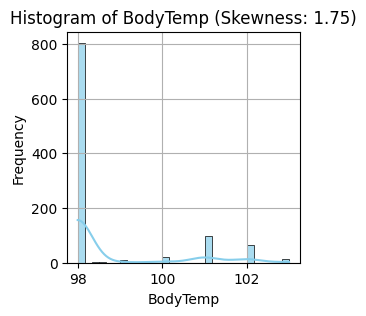

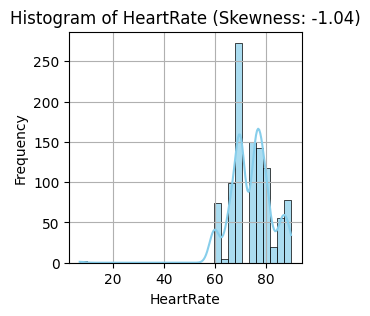

In [11]:
import seaborn as sns

skewed = X.skew()


for column in X.columns:
    plt.figure(figsize=(3, 3))  # Set the figure size for each plot
    sns.histplot(X[column], bins=30, kde=True, color='skyblue', alpha=0.7)  # Use histplot for histogram with KDE
    plt.title(f'Histogram of {column} (Skewness: {skewed[column]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)  # Optional: Add a grid for better readability
    plt.show() 


# . Converting Categorical data to Numerical Data:
The target variable has 3 classes, named as 'low risk', 'mid risk', 'high risk'. Convert them into  numeric values of 0 for low risk , 1 for mid risk and 2 for high risk. This is done using map function.

In [12]:
from ucimlrepo import fetch_ucirepo 
import numpy as np 
import  pandas as pd
  
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
X = maternal_health_risk.data.features 
y = maternal_health_risk.data.targets 

# Conversion from categorical data to numeric data:
risk_mapping = {
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2
}

y.loc[:,'RiskLevel'] = y['RiskLevel'].map(risk_mapping)
y.head(10)


,RiskLevel
0,2
1,2
2,2
3,2
4,0
5,2
6,1
7,2
8,1
9,2


# . Conversion Using LabelEncoder:
We can also convert categorical data to numerical data using LabelEncoder availble in Sklearn. This method is also suitable for large datasets.LabelEncoder maps the categories to the corresponding numerical values.


In [13]:
from ucimlrepo import fetch_ucirepo 
import numpy as np 
import  pandas as pd
from sklearn.preprocessing import LabelEncoder
  
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
X = maternal_health_risk.data.features 
y = maternal_health_risk.data.targets 

label_encoder = LabelEncoder()
y['RiskLevel'] = label_encoder.fit_transform(y['RiskLevel'])
y.head(10)

C:\Users\Usman Zaheer\AppData\Local\Temp\ipykernel_12924\1247862346.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['RiskLevel'] = label_encoder.fit_transform(y['RiskLevel'])


,RiskLevel
0,0
1,0
2,0
3,0
4,1
5,0
6,2
7,0
8,2
9,0


In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   RiskLevel  1014 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


# . Check the numeric values corresponding to each category of target variable:


In [15]:
# Check the mapping of categories to labels
categories = label_encoder.classes_
print("Categories and their corresponding labels:")
for category, label in zip(categories, range(len(categories))):
    print(f"{category}: {label}")


Categories and their corresponding labels:
high risk: 0
low risk: 1
mid risk: 2


# . Skewness Of target variable:

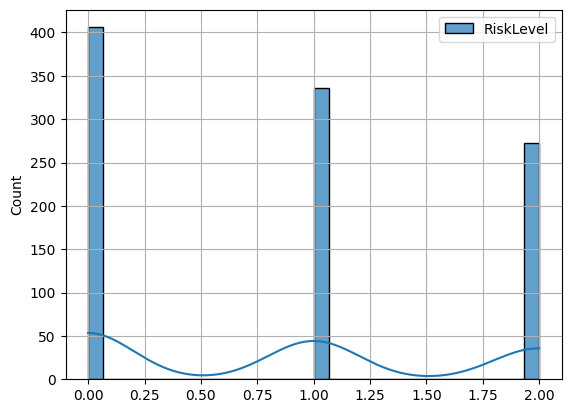

In [16]:

from ucimlrepo import fetch_ucirepo 
import numpy as np 
import  pandas as pd
  
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
X = maternal_health_risk.data.features 
y = maternal_health_risk.data.targets 

# Conversion from categorical data to numeric data:
risk_mapping = {
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2
}

y.loc[:,'RiskLevel'] = y['RiskLevel'].map(risk_mapping)
y.head(10)

yskew=y.skew()
sns.histplot(y, bins=30, kde=True, color='skyblue', alpha=0.7)
plt.grid()
plt.show()


# . Printing Metadata:

In [17]:
maternal_health_risk.metadata

{'uci_id': 863,
 'name': 'Maternal Health Risk',
 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk',
 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv',
 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1013,
 'num_features': 6,
 'feature_types': ['Real', 'Integer'],
 'demographics': ['Age'],
 'target_col': ['RiskLevel'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2020,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DP5D',
 'creators': ['Marzia Ahmed'],
 'intro_paper': {'ID': 274,
  'type': 'NATIVE',
  'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of T

# . Coverting Metadata into a presentable Format:

In [18]:
metadata = {'uci_id': 863,
 'name': 'Maternal Health Risk',
 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk',
 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv',
 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1013,
 'num_features': 6,
 'feature_types': ['Real', 'Integer'],
 'demographics': ['Age'],
 'target_col': ['RiskLevel'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2020,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DP5D',
 'creators': ['Marzia Ahmed'],
 'intro_paper': {'ID': 274,
  'type': 'NATIVE',
  'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)',
  'authors': 'Marzia Ahmed, M. A. Kashem, Mostafijur Rahman, S. Khatun',
  'venue': ' Lecture Notes in Electrical Engineering, vol 632',

  'recommended_data_splits': None,
  'sensitive_data': None,
  'preprocessing_description': None,
  'variable_info': None,
  'citation': None}}

formatted_metadata = pd.json_normalize(metadata)
dataframe = pd.DataFrame(formatted_metadata)
print(dataframe)

dataframe.to_csv('metadata.txt',sep='\t',index=False)


   uci_id                  name  \
0     863  Maternal Health Risk   

                                      repository_url  \
0  https://archive.ics.uci.edu/dataset/863/matern...   

                                            data_url  \
0  https://archive.ics.uci.edu/static/public/863/...   

                                            abstract                 area  \
0  Data has been collected from different hospita...  Health and Medicine   

              tasks characteristics  num_instances  num_features  ...  \
0  [Classification]  [Multivariate]           1013             6  ...   

  intro_paper.ID intro_paper.type  \
0            274           NATIVE   

                                   intro_paper.title  \
0  Review and Analysis of Risk Factor of Maternal...   

                                 intro_paper.authors  \
0  Marzia Ahmed, M. A. Kashem, Mostafijur Rahman,...   

                                   intro_paper.venue  \
0   Lecture Notes in Electrical Engineering,

# . Preprocessing Techniques Used:

1. Separate the features and target variables

2. Check for null values in the dataset

3. Draw simple graphs of features and target variable to get some more insight.

4. Check the skewness of dataset.

5. plot the skewness.

6. Print metadata.

# . Coverting Features and target variable into tensor:

In [19]:
X = X.values

In [20]:
X[: 5]

array([[ 25. , 130. ,  80. ,  15. ,  98. ,  86. ],
       [ 35. , 140. ,  90. ,  13. ,  98. ,  70. ],
       [ 29. ,  90. ,  70. ,   8. , 100. ,  80. ],
       [ 30. , 140. ,  85. ,   7. ,  98. ,  70. ],
       [ 35. , 120. ,  60. ,   6.1,  98. ,  76. ]])

In [21]:
type(X)

numpy.ndarray

In [22]:
y = y.values
y


array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [1]], dtype=object)

In [23]:
X.dtype

dtype('float64')

In [29]:

y = y.astype(np.float32)
y.dtype

dtype('float32')

In [30]:
import torch
from torch.utils.data import TensorDataset,DataLoader
dataset = TensorDataset(torch.tensor(X).float(),torch.tensor(y).float())

In [31]:
dataset[:5]

(tensor([[ 25.0000, 130.0000,  80.0000,  15.0000,  98.0000,  86.0000],
         [ 35.0000, 140.0000,  90.0000,  13.0000,  98.0000,  70.0000],
         [ 29.0000,  90.0000,  70.0000,   8.0000, 100.0000,  80.0000],
         [ 30.0000, 140.0000,  85.0000,   7.0000,  98.0000,  70.0000],
         [ 35.0000, 120.0000,  60.0000,   6.1000,  98.0000,  76.0000]]),
 tensor([[2.],
         [2.],
         [2.],
         [2.],
         [0.]]))

In [32]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
dataloader

# **************************************************************************************************************